In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set()
%precision 3

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


'%.3f'

In [14]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)


In [18]:
model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
from sklearn import metrics
predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected, predicted))

0.9736842105263158


In [20]:

from sklearn import svm

# 図示できるのが2次元までなので、変数を2つに絞ります。
X = iris.data[:,:2]
Y = iris.target

# SVMの正則化パラメータです。
C = 1.0  

# SVC with a Linear Kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:

# step size
h = 0.02

# X軸の最大最小
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y軸の最大最小
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# meshgridを作ります。
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [22]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]


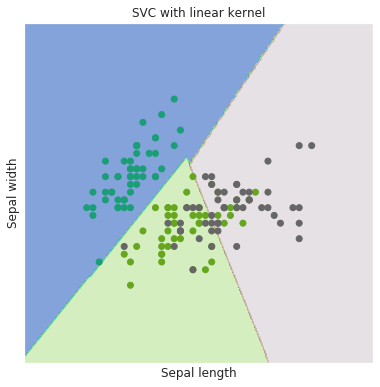

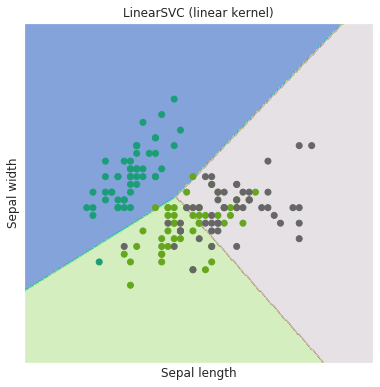

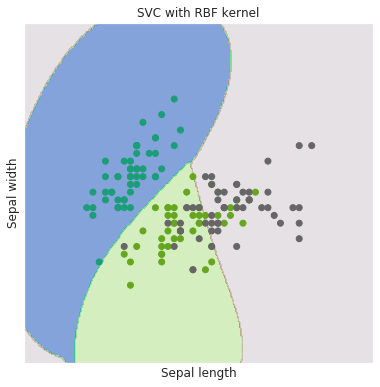

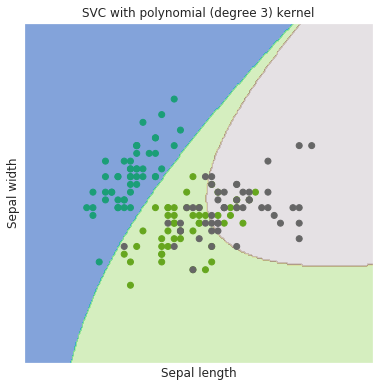

In [23]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # 境界線を描画します。
    plt.figure(figsize=(15,15))
    plt.subplot(2, 2, i + 1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

